In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Introduction:**

Today we will continue exploring the Power lifting data set with some Exploratory Data Analysis. In the exploration we want to get a general idea of what the data is saying and report those insights.

<img src="https://www.openpowerlifting.org/static/images/logo-compressed.e87731f9ce53411287c05e88356bf68e.svg" >

In [2]:
powerlift = pd.read_csv('powerlift.csv', index_col = 'Unnamed: 0')
powerlift['WILKS Level'] = powerlift['WILKS Level'].replace('Very Hight WILKS', 'Very High WILKS').replace('Hight WILKS', 'High WILKS')
powerlift.head()


,MeetID,Name,Sex,Equipment,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Wilks,Federation,Squat Weight,Bench Weight,Deadlift Weight,Total Weight,WILKS Level,Cluster Name
0,0,Angie Belk Terry,F,Wraps,59.60,60,47.63,20.41,70.31,138.35,155.05,Not IPF,Light Squat,Very Light Bench,Very Light DL,Very Light Total,Very Low WILKS,Heavy and Weak
1,0,Dawn Bogart,F,Single-ply,58.51,60,142.88,95.25,163.29,401.42,456.38,Not IPF,Moderate Squat,Moderate Bench,Moderate DL,Moderate Total,Very High WILKS,Average and Average
2,0,Dawn Bogart,F,Raw,58.51,60,0.00,95.25,0.00,95.25,108.29,Not IPF,Very Light Squat,Moderate Bench,Very Light DL,Very Light Total,Very Low WILKS,Heavy and Weak
3,0,Destiny Dula,F,Raw,63.68,67.5,0.00,31.75,90.72,122.47,130.47,Not IPF,Very Light Squat,Very Light Bench,Very Light DL,Very Light Total,Very Low WILKS,Heavy and Weak
4,0,Courtney Norris,F,Wraps,62.41,67.5,170.10,77.11,145.15,392.36,424.40,Not IPF,Moderate Squat,Light Bench,Light DL,Moderate Total,Very High WILKS,Average and Strong


**Bar Charts:**
Let's start looking at some data with bar charts! The function below creates a bar chart based on filtering and aggregating our data. We filter the data by defining a column name and choosing a value in that column. We aggregate our data with choosing the column as a group. Here is where the groups that we created are useful. They act as a summary of what the other columns offer in a simple format. This is useful for exploring the data at a high level and looking at one categorical variable at a time. Something to keep in mind is that we have to be extra aware of the x values since they are not always listed in an intuitive nor consistent way. For example, the Wilks columns do not go in ascending order (from very low to very high) unless the data follows the same trend.

In [3]:
def powerlift_barchart(column, value_type, group):
    col_value = powerlift[column] == value_type
    powerlift_value = powerlift[col_value]
    count_group = powerlift_value[group].value_counts()
    ax = sns.barplot(count_group.index, count_group.values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    ax.set(ylabel='Count', xlabel = group)
    ax.set_title(column + "-" + value_type)
    plt.show()


**Let's explore WILKS scores!** A WILKS score is the most common formula used in strengths sports to determine an athlete's strength relative to their weight. I will look at different columns and values in relation to a WILKS Level. 

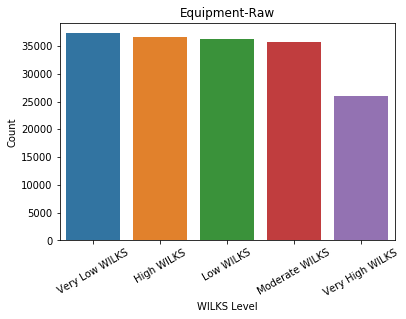

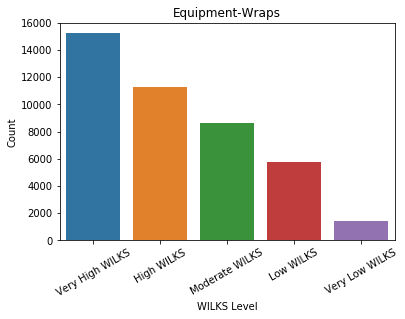

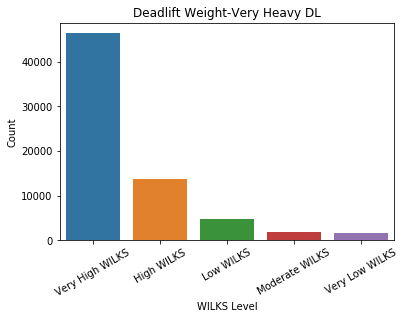

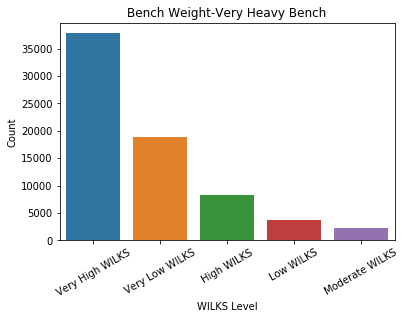

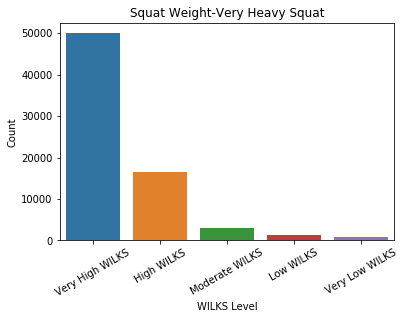

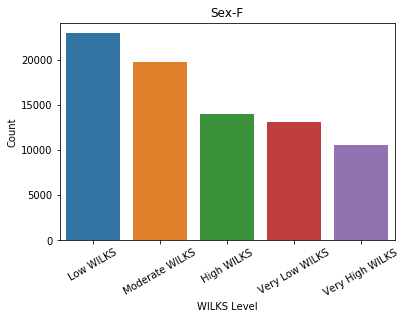

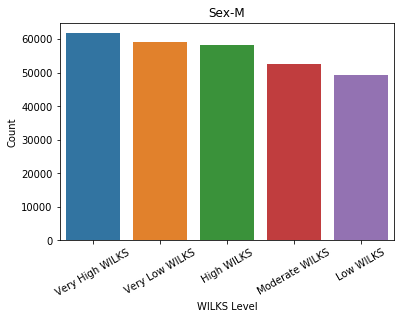

In [4]:
powerlift_barchart( 'Equipment', 'Raw', 'WILKS Level')
powerlift_barchart( 'Equipment', 'Wraps', 'WILKS Level')
powerlift_barchart( 'Deadlift Weight', 'Very Heavy DL', 'WILKS Level')
powerlift_barchart( 'Bench Weight', 'Very Heavy Bench', 'WILKS Level')
powerlift_barchart( 'Squat Weight', 'Very Heavy Squat', 'WILKS Level')
powerlift_barchart( 'Sex', 'F', 'WILKS Level')
powerlift_barchart( 'Sex', 'M', 'WILKS Level')

**Heat Maps:** By pivoting the data and creating a heat map we are able to look at more than one variable at a time. In the function below the last parameter is an arbitrary column. Arbitrary in the sense that it can be any column other than the first two called. If it is not called, then we will have the the same plot given too many times (one for every other column in the dataframe).

In [5]:
def powerlift_pivot_count(rows, columns, calc_field):
    powerlift_pivot = powerlift.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    sns.heatmap(powerlift_pivot, annot = True, fmt = 'g')
    plt.show()

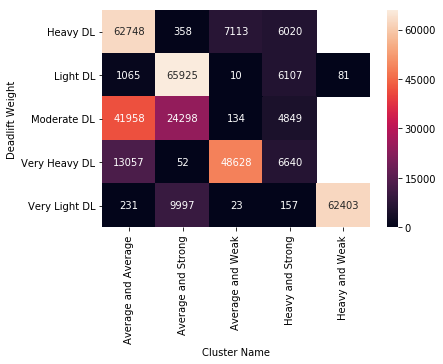

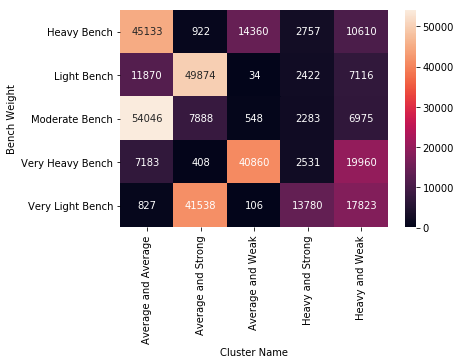

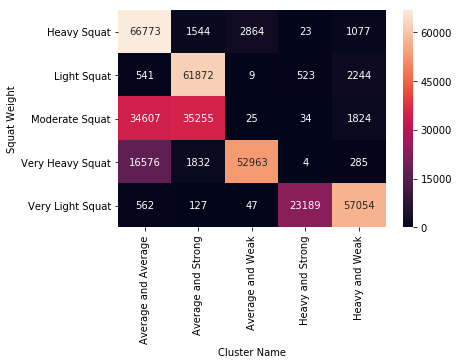

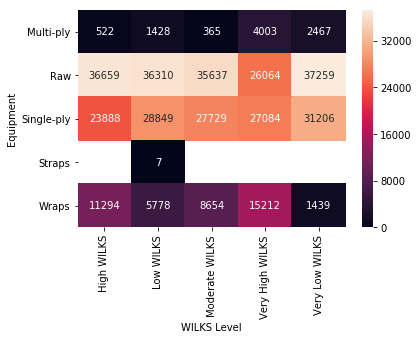

In [13]:
powerlift_pivot_count( 'Deadlift Weight', 'Cluster Name', 'Federation')
powerlift_pivot_count( 'Bench Weight', 'Cluster Name', 'Federation')
powerlift_pivot_count( 'Squat Weight', 'Cluster Name', 'Federation')
powerlift_pivot_count( 'Equipment', 'WILKS Level', 'Federation')

A common thing to do is gather information based on time. This data is unclear about meet number, which means that a meet number doesn't necessarily have to be reported in order. So a wiser decision is to opt out of a time analysis

C:\Users\alber\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


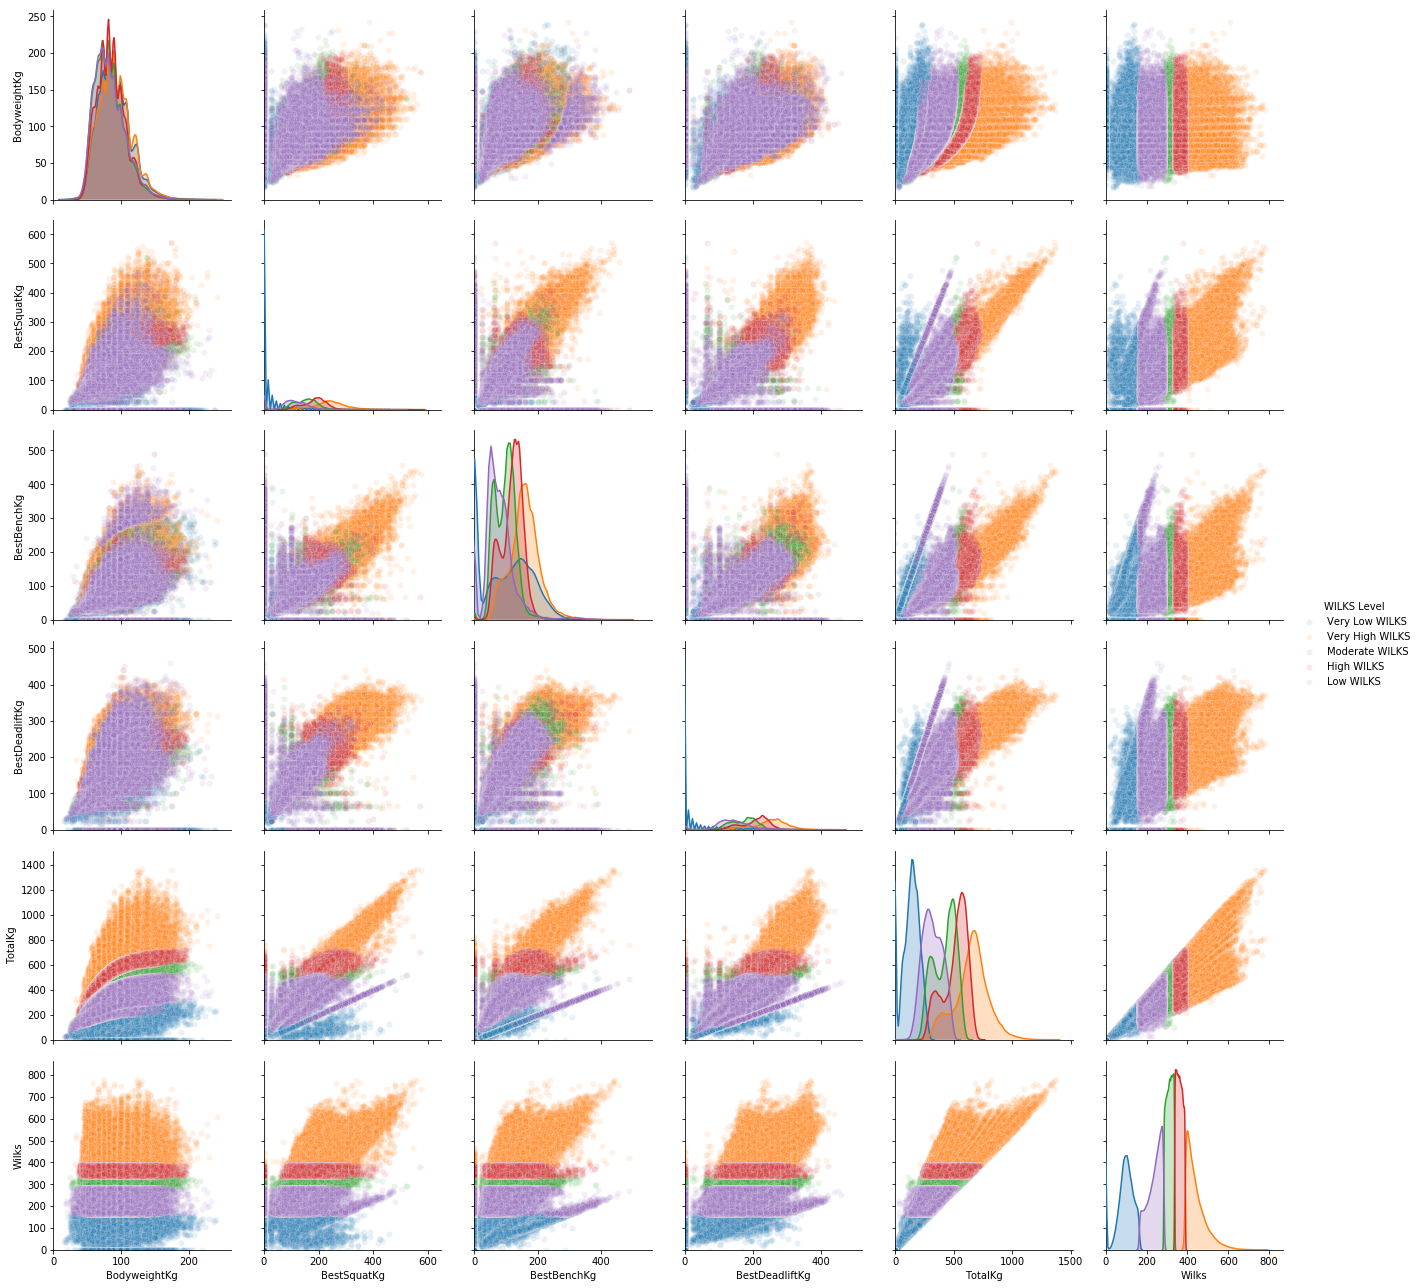

In [15]:
select_columns = ['BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']
sns.pairplot(powerlift, height = 3, vars = select_columns, hue = 'WILKS Level', plot_kws = { 'alpha': 0.1}).set(xlim = (0), ylim = (0))
plt.show()

from this chart we can see what the relationships are and the cluster bounderies 

The beauty of this frame work is the simplicity and that it is reproducible for other data sets. 

In the next part I will create a module that will contain all the functions and used here.